# Belgian GP 2022 resume

This jupyter notebook contains some insights about the Belgian Grand Prix runned in SPA-Francorchamps on August 28th 2022

## Setup

First let's load some libraries that will be useful

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Load information

The information is taken from the website of pitwall.app, the data is the time lap from the drivers and the position, let's load the information of the top 6 drivers, Max, Perez, Sainz, Russel, Alonso and Leclerc

First lets load the information of Max and Perez

In [2]:
info_1_2 = pd.read_html('https://pitwall.app/compare-lap-times?utf8=%E2%9C%93&season=74&race=1169&main_driver=14&compare_driver=11&button=')[0]

In [3]:
info_1_2.head()

,Lap,Driver,Pos,Time VER,Driver.1,Pos.1,Time PER,Delta
0,1,#33 Max Verstappen,8th,2:03.282,#11 Sergio PÃ©rez,2nd,1:56.093,7.189
1,2,#33 Max Verstappen,8th,2:19.517,#11 Sergio PÃ©rez,2nd,2:12.454,7.063
2,3,#33 Max Verstappen,8th,3:04.045,#11 Sergio PÃ©rez,2nd,3:06.529,-2.484
3,4,#33 Max Verstappen,8th,2:56.460,#11 Sergio PÃ©rez,2nd,3:05.892,-9.432
4,5,#33 Max Verstappen,6th,1:53.951,#11 Sergio PÃ©rez,2nd,1:52.872,1.079


In [4]:
lap_ver = info_1_2.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time PER','Delta'])
lap_ver['Pos'] = [int(x[:-2]) for x in list(lap_ver['Pos'])]

In [5]:
lap_ver.head()

,Pos,Time VER
Lap,,
1,8,2:03.282
2,8,2:19.517
3,8,3:04.045
4,8,2:56.460
5,6,1:53.951


In [6]:
lap_per = info_1_2.set_index('Lap').drop(columns=['Driver','Pos','Time VER','Driver.1','Delta'])
lap_per = lap_per.rename(columns={'Pos.1':'Pos'})
lap_per['Pos'] = [int(x[:-2]) for x in list(lap_per['Pos'])]

In [7]:
lap_per.head()

,Pos,Time PER
Lap,,
1,2,1:56.093
2,2,2:12.454
3,2,3:06.529
4,2,3:05.892
5,2,1:52.872


Now for the third and fouth place Sainz and Russel

In [8]:
info_3_4 = pd.read_html('https://pitwall.app/compare-lap-times?utf8=%E2%9C%93&season=74&race=1169&main_driver=8&compare_driver=20&button=')[0]

In [9]:
info_3_4.head()

,Lap,Driver,Pos,Time SAI,Driver.1,Pos.1,Time RUS,Delta
0,1,#55 Carlos Sainz,1st,1:53.943,#63 George Russell,3rd,1:57.286,-3.343
1,2,#55 Carlos Sainz,1st,2:11.068,#63 George Russell,3rd,2:14.791,-3.723
2,3,#55 Carlos Sainz,1st,3:07.807,#63 George Russell,3rd,3:04.806,3.001
3,4,#55 Carlos Sainz,1st,3:07.552,#63 George Russell,3rd,3:04.245,3.307
4,5,#55 Carlos Sainz,1st,1:52.198,#63 George Russell,3rd,1:53.854,-1.656


In [10]:
lap_sai = info_3_4.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time RUS','Delta'])
lap_sai['Pos'] = [int(x[:-2]) for x in list(lap_sai['Pos'])]

In [11]:
lap_sai.head()

,Pos,Time SAI
Lap,,
1,1,1:53.943
2,1,2:11.068
3,1,3:07.807
4,1,3:07.552
5,1,1:52.198


In [12]:
lap_rus = info_3_4.set_index('Lap').drop(columns=['Driver','Pos','Time SAI','Driver.1','Delta'])
lap_rus = lap_rus.rename(columns={'Pos.1':'Pos'})
lap_rus['Pos'] = [int(x[:-2]) for x in list(lap_rus['Pos'])]

In [13]:
lap_rus.head()

,Pos,Time RUS
Lap,,
1,3,1:57.286
2,3,2:14.791
3,3,3:04.806
4,3,3:04.245
5,3,1:53.854


Finally lets take the data from the fifth and sixth place Alonso and Leclerc

In [14]:
info_5_6 = pd.read_html('https://pitwall.app/compare-lap-times?utf8=%E2%9C%93&season=74&race=1169&main_driver=22&compare_driver=3&button=')[0]

In [15]:
info_5_6.head()

,Lap,Driver,Pos,Time ALO,Driver.1,Pos.1,Time LEC,Delta
0,1,#14 Fernando Alonso,4th,1:59.705,#16 Charles Leclerc,10th,2:04.040,-4.335
1,2,#14 Fernando Alonso,4th,2:15.896,#16 Charles Leclerc,9th,2:20.480,-4.584
2,3,#14 Fernando Alonso,4th,3:03.757,#16 Charles Leclerc,12th,3:07.212,-3.455
3,4,#14 Fernando Alonso,4th,3:02.258,#16 Charles Leclerc,17th,2:56.292,5.966
4,5,#14 Fernando Alonso,4th,1:54.347,#16 Charles Leclerc,17th,1:55.169,-0.822


In [16]:
lap_alo = info_5_6.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time LEC','Delta'])
lap_alo['Pos'] = [int(x[:-2]) for x in list(lap_alo['Pos'])]

In [17]:
lap_alo.head()

,Pos,Time ALO
Lap,,
1,4,1:59.705
2,4,2:15.896
3,4,3:03.757
4,4,3:02.258
5,4,1:54.347


In [18]:
lap_lec = info_5_6.set_index('Lap').drop(columns=['Driver','Driver.1','Pos','Time ALO','Delta'])
lap_lec = lap_lec.rename(columns={'Pos.1':'Pos'})
lap_lec['Pos'] = [int(x[:-2]) for x in list(lap_lec['Pos'])]

In [19]:
lap_lec.head()

,Pos,Time LEC
Lap,,
1,10,2:04.040
2,9,2:20.480
3,12,3:07.212
4,17,2:56.292
5,17,1:55.169


## Comparison of times of the first six drivers

The first graph will be a timeseries plot of the the lap time of each pilot

In [20]:
lapg = range(1,45)
laptV = list(lap_ver['Time VER'])
laptP = list(lap_per['Time PER'])
laptS = list(lap_sai['Time SAI'])
laptR = list(lap_rus['Time RUS'])
laptA = list(lap_alo['Time ALO'])
laptL = list(lap_lec['Time LEC'])

In [21]:
x = lapg
yV = mdates.datestr2num(laptV)
yP = mdates.datestr2num(laptP)
yS = mdates.datestr2num(laptS)
yR = mdates.datestr2num(laptR)
yA = mdates.datestr2num(laptA)
yL = mdates.datestr2num(laptL)

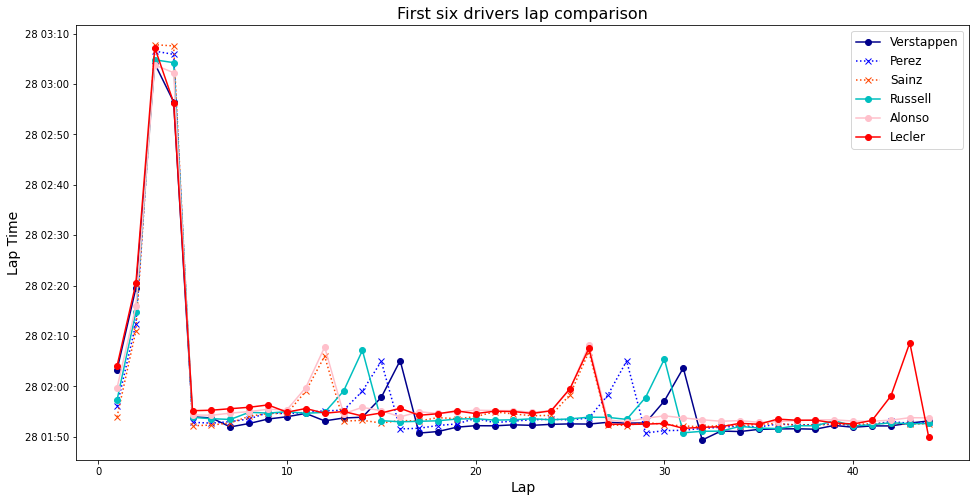

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,yV, color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x,yP,'bx:', label='Perez')
ax.plot(x,yS, color='orangered', linestyle='dotted', marker='x', label='Sainz')
ax.plot(x,yR,'co-', label='Russell')
ax.plot(x,yA, color='pink', linestyle='solid', marker='o', label='Alonso')
ax.plot(x,yL,'ro-', label='Lecler')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison', fontsize=16)
ax.legend(loc='upper right', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison.jpeg')

The first four laps, were Hamilton and Bottas cars were taken out, does not allow to view the comparison of the Time Lap, so let's plot just from the fifth lap and so on. 

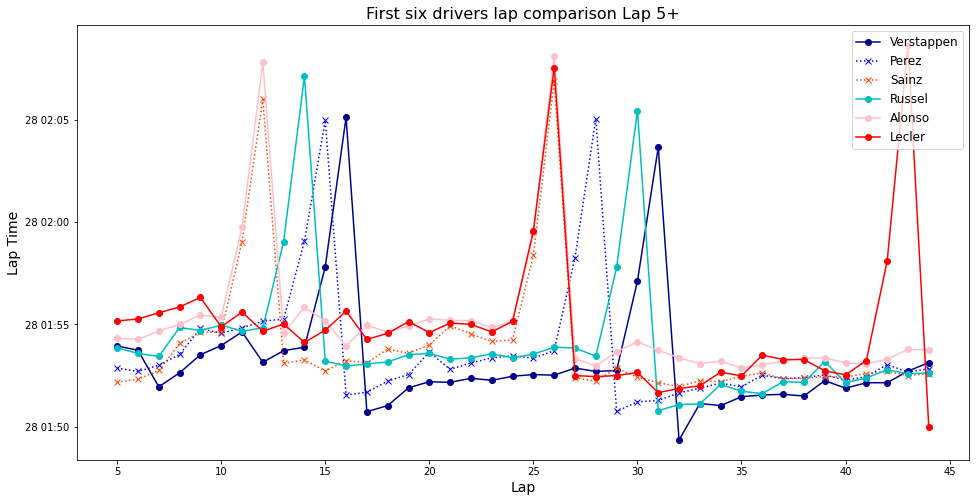

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x[4:],yV[4:], color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x[4:],yP[4:],'bx:', label='Perez')
ax.plot(x[4:],yS[4:], color='orangered', linestyle='dotted', marker='x', label='Sainz')
ax.plot(x[4:],yR[4:],'co-', label='Russel')
ax.plot(x[4:],yA[4:], color='pink', linestyle='solid', marker='o', label='Alonso')
ax.plot(x[4:],yL[4:],'ro-', label='Lecler')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_xlabel('Lap', fontsize=14)
ax.set_title('First six drivers lap comparison Lap 5+', fontsize=16)
ax.legend(loc='upper right', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison Lap 5+.jpeg')

We can see that the fastest car was the one from Verstappen, another insight is that Verstappen is quicker by getting the tyres in temperature when making a pit stop

And the fastest lap is from Verstappen so lets find it, although Charles Leclerc almost achieve it by the end of the race

In [25]:
fastest_lap = lap_ver.index.values.astype(int)[lap_ver['Time VER'] == min(lap_ver['Time VER'])]
fastest = min(lap_ver['Time VER'])

In [26]:
print('The fastest lap was', fastest, 'on lap', fastest_lap)

The fastest lap was 1:49.354 on lap [32]


Right away after he makes the last pit stop and change tyres on new mediums.

## Tyres times comparison 

First let's check the average lap time tyres comparison of Max Verstappen

In [27]:
ver_1s = lap_ver.iloc[4:14]
ver_2m = lap_ver.iloc[16:29]
ver_3m = lap_ver.iloc[31:44]

In [28]:
yV_1s = mdates.datestr2num(list(ver_1s['Time VER']))
yV_2m = mdates.datestr2num(list(ver_2m['Time VER']))
yV_3m = mdates.datestr2num(list(ver_3m['Time VER']))

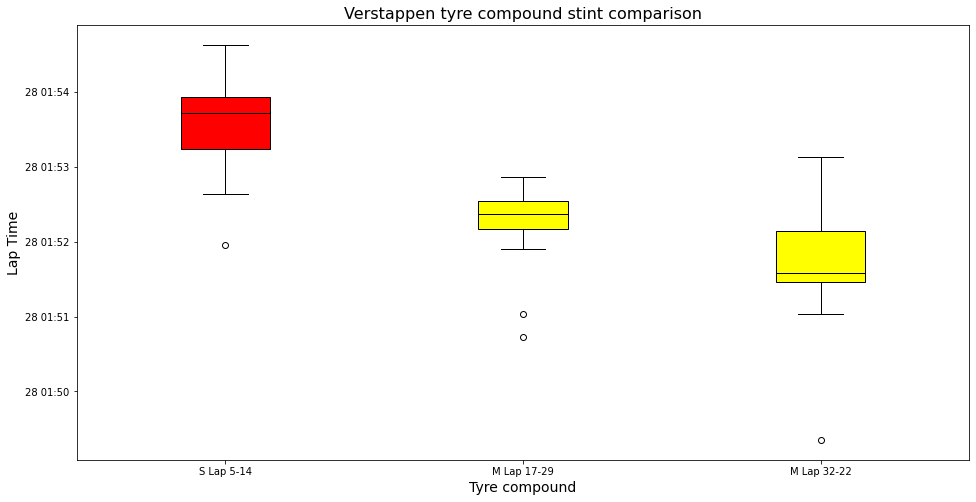

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
bplotV = ax.boxplot((yV_1s,yV_2m,yV_3m),
          patch_artist=True,
          labels = ['S Lap 5-14','M Lap 17-29','M Lap 32-22'],
          medianprops=dict(color='black'))
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Verstappen tyre compound stint comparison', fontsize=16)
bplotV['boxes'][0].set_facecolor('red')
bplotV['boxes'][1].set_facecolor('yellow')
bplotV['boxes'][2].set_facecolor('yellow')
plt.show
fig.savefig('Max Verstappen BP Tyre.jpeg')

Now let's check for the average lap time of Perez

In [30]:
per_1m = lap_per.iloc[4:13]
per_2m = lap_per.iloc[15:26]
per_3h = lap_per.iloc[28:44]

In [31]:
yP_1m = mdates.datestr2num(list(per_1m['Time PER']))
yP_2m = mdates.datestr2num(list(per_2m['Time PER']))
yP_3h = mdates.datestr2num(list(per_3h['Time PER']))

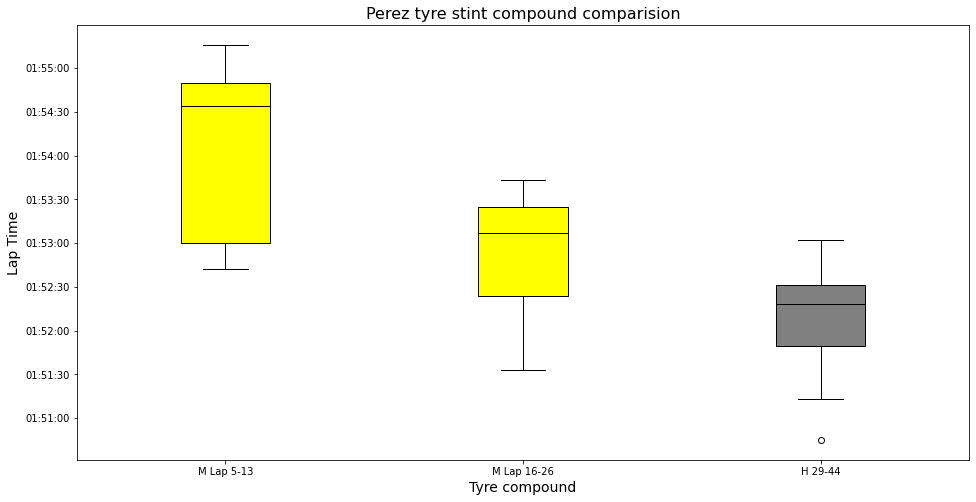

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
bplotP = ax.boxplot((yP_1m,yP_2m,yP_3h),
          patch_artist=True,
          labels = ['M Lap 5-13','M Lap 16-26','H 29-44'],
          medianprops=dict(color='black'))
bplotP['boxes'][0].set_facecolor('yellow')
bplotP['boxes'][1].set_facecolor('yellow')
bplotP['boxes'][2].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Perez tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Sergio Perez BP Tyre.jpeg')

Next one is the lap time average of Sainz

In [33]:
sai_1s = lap_sai.iloc[4:10]
sai_2m = lap_sai.iloc[12:24]
sai_3h = lap_sai.iloc[26:44]

In [34]:
yS_1s = mdates.datestr2num(list(sai_1s['Time SAI']))
yS_2m = mdates.datestr2num(list(sai_2m['Time SAI']))
yS_3h = mdates.datestr2num(list(sai_3h['Time SAI']))

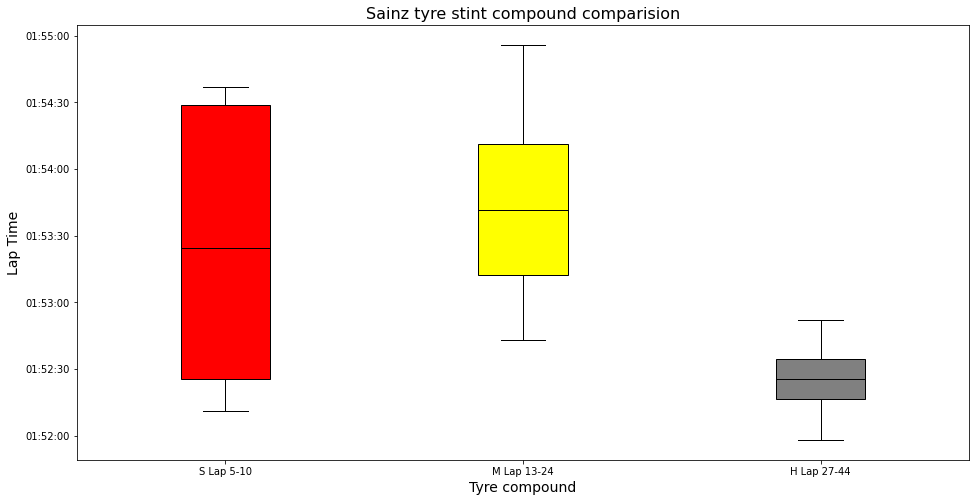

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
bplotS = ax.boxplot((yS_1s,yS_2m,yS_3h),
          patch_artist=True,
          labels = ['S Lap 5-10','M Lap 13-24','H Lap 27-44'],
          medianprops=dict(color='black'))
bplotS['boxes'][0].set_facecolor('red')
bplotS['boxes'][1].set_facecolor('yellow')
bplotS['boxes'][2].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Sainz tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Carlos Sainz BP Tyre.jpeg')

The next one is for George Russell 

In [36]:
rus_1m = lap_rus.iloc[4:12]
rus_2m = lap_rus.iloc[14:28]
rus_3h = lap_rus.iloc[30:44]

In [37]:
yR_1m = mdates.datestr2num(list(rus_1m['Time RUS']))
yR_2m = mdates.datestr2num(list(rus_2m['Time RUS']))
yR_3h = mdates.datestr2num(list(rus_3h['Time RUS']))

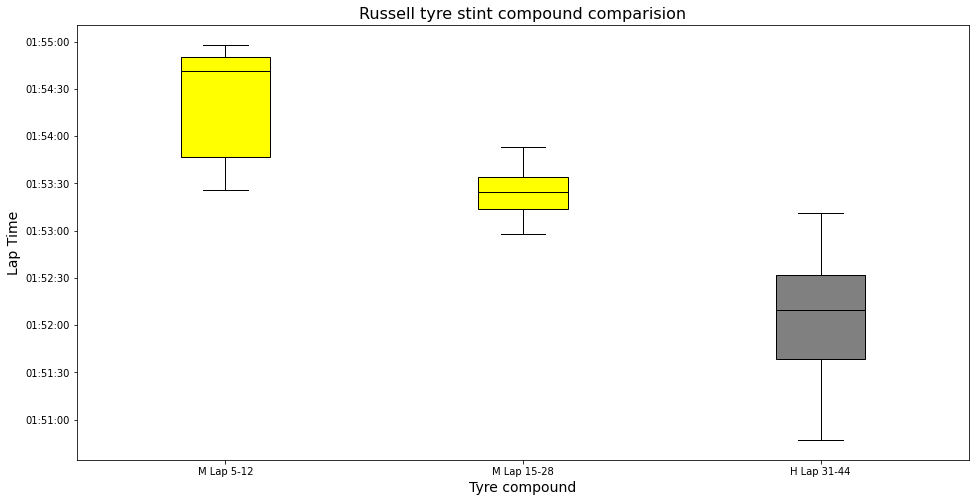

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
bplotR = ax.boxplot((yR_1m,yR_2m,yR_3h),
          patch_artist=True,
          labels = ['M Lap 5-12','M Lap 15-28','H Lap 31-44'],
          medianprops=dict(color='black'))
bplotR['boxes'][0].set_facecolor('yellow')
bplotR['boxes'][1].set_facecolor('yellow')
bplotR['boxes'][2].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Russell tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('George Russel BP Tyre.jpeg')

Now for Fernando Alonso

In [39]:
alo_1m = lap_alo.iloc[4:10]
alo_2m = lap_alo.iloc[12:24]
alo_3h = lap_alo.iloc[26:44]

In [40]:
yA_1m = mdates.datestr2num(list(alo_1m['Time ALO']))
yA_2m = mdates.datestr2num(list(alo_2m['Time ALO']))
yA_3h = mdates.datestr2num(list(alo_3h['Time ALO']))

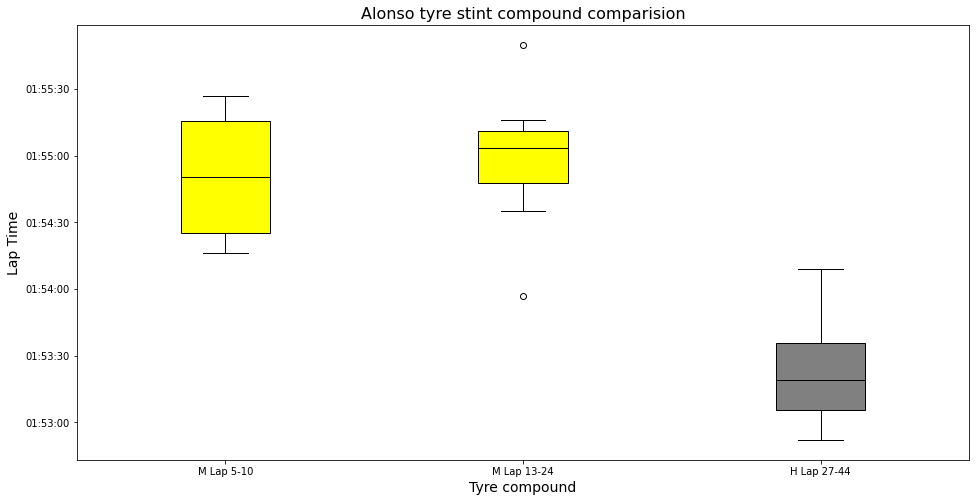

In [41]:
fig, ax = plt.subplots(figsize=(16,8))
bplotA = ax.boxplot((yA_1m,yA_2m,yA_3h),
          patch_artist=True,
          labels = ['M Lap 5-10','M Lap 13-24','H Lap 27-44'],
          medianprops=dict(color='black'))
bplotA['boxes'][0].set_facecolor('yellow')
bplotA['boxes'][1].set_facecolor('yellow')
bplotA['boxes'][2].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Alonso tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Fernando Alonso BP Tyre.jpeg')

And finally for Leclerc, but because he make an early stop due to a problem in the car, the first stint on softs will not be plotted, it was under safety car after lap 5, and neither latest tire compounds.

In [42]:
lec_1m = lap_lec.iloc[4:24]
lec_2m = lap_lec.iloc[26:41]

In [43]:
yL_1m = mdates.datestr2num(list(lec_1m['Time LEC']))
yL_2m = mdates.datestr2num(list(lec_2m['Time LEC']))

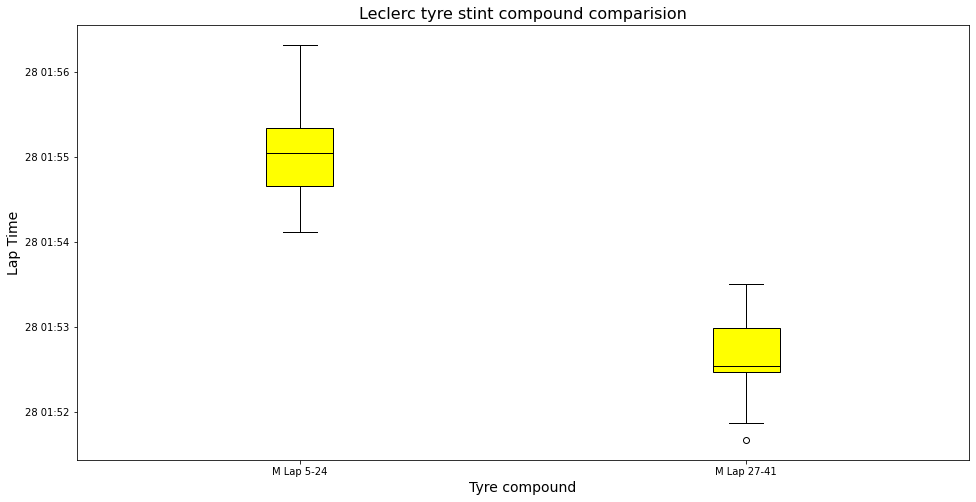

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
bplotL = ax.boxplot((yL_1m,yL_2m),
          patch_artist=True,
          labels = ['M Lap 5-24','M Lap 27-41'],
          medianprops=dict(color='black'))
bplotL['boxes'][0].set_facecolor('yellow')
bplotL['boxes'][1].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Leclerc tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Charles Leclerc BP Tyre.jpeg')

# Comparison time laps between pilots

Finally let's make a comparison between the pilots, the first stint is from lap 5 to between lap 10 and 14, due that Charles Leclerc does not make this stop it will be plotted from lap 5 and lap 14

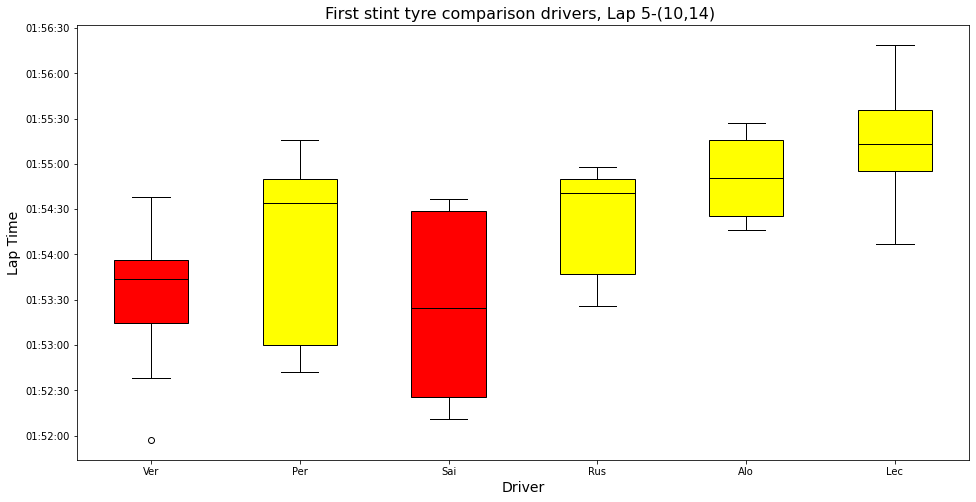

In [45]:
fig, ax = plt.subplots(figsize=(16,8))
bplot1 = ax.boxplot((yV_1s,yP_1m,yS_1s,yR_1m,yA_1m,yL_1m[:10]),
          patch_artist=True,
          labels = ['Ver','Per','Sai','Rus','Alo','Lec'],
          medianprops=dict(color='black'))
bplot1['boxes'][0].set_facecolor('red')
bplot1['boxes'][1].set_facecolor('yellow')
bplot1['boxes'][2].set_facecolor('red')
bplot1['boxes'][3].set_facecolor('yellow')
bplot1['boxes'][4].set_facecolor('yellow')
bplot1['boxes'][5].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('First stint tyre comparison drivers, Lap 5-(10,14) ', fontsize=16)
plt.show
fig.savefig('First stint tyre.jpeg')

Now for the second stint which was began between the laps (10-14) and ended in the laps (24-29), for Charles Leclerc we take from lap 14 to 24.

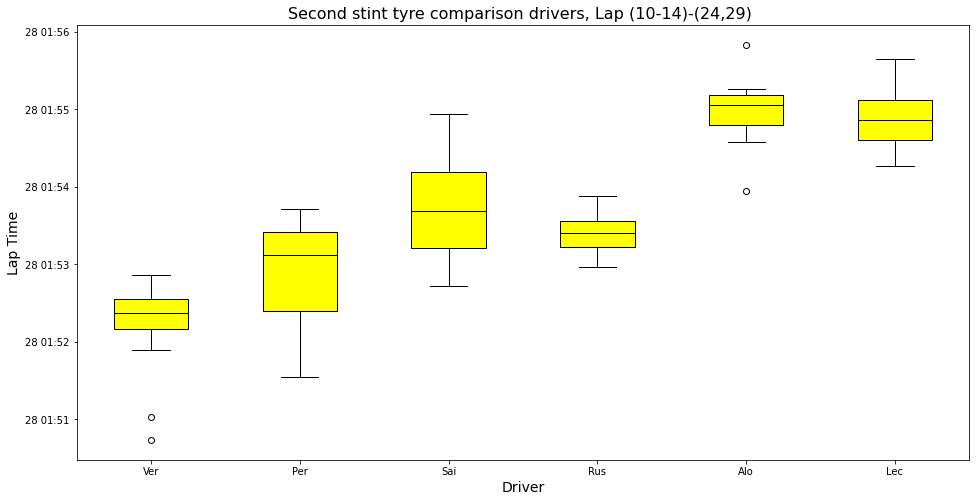

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
bplot2 = ax.boxplot((yV_2m,yP_2m,yS_2m,yR_2m,yA_2m,yL_1m[10:]),
          patch_artist=True,
          labels = ['Ver','Per','Sai','Rus','Alo','Lec'],
          medianprops=dict(color='black'))
bplot2['boxes'][0].set_facecolor('yellow')
bplot2['boxes'][1].set_facecolor('yellow')
bplot2['boxes'][2].set_facecolor('yellow')
bplot2['boxes'][3].set_facecolor('yellow')
bplot2['boxes'][4].set_facecolor('yellow')
bplot2['boxes'][5].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Second stint tyre comparison drivers, Lap (10-14)-(24,29) ', fontsize=16)
plt.show
fig.savefig('Second stint tyre comparison.jpeg')

And finally the third stint

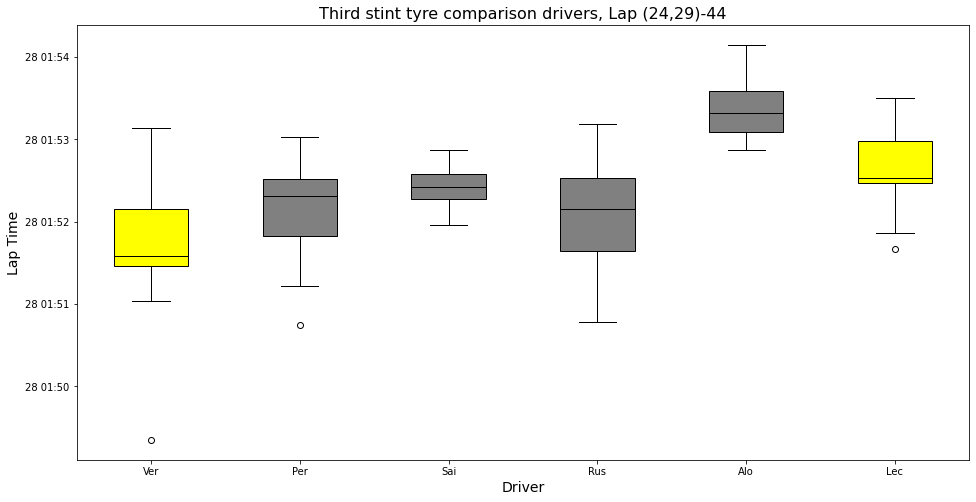

In [47]:
fig, ax = plt.subplots(figsize=(16,8))
bplot3 = ax.boxplot((yV_3m,yP_3h,yS_3h,yR_3h,yA_3h,yL_2m),
          patch_artist=True,
          labels = ['Ver','Per','Sai','Rus','Alo','Lec'],
          medianprops=dict(color='black'))
bplot3['boxes'][0].set_facecolor('yellow')
bplot3['boxes'][1].set_facecolor('gray')
bplot3['boxes'][2].set_facecolor('gray')
bplot3['boxes'][3].set_facecolor('gray')
bplot3['boxes'][4].set_facecolor('gray')
bplot3['boxes'][5].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Third stint tyre comparison drivers, Lap (24,29)-44', fontsize=16)
plt.show
fig.savefig('Third stint tyre comparison.jpeg')

# Timeseries for race position

Finally a time series plot for the position of the first 6 drivers.

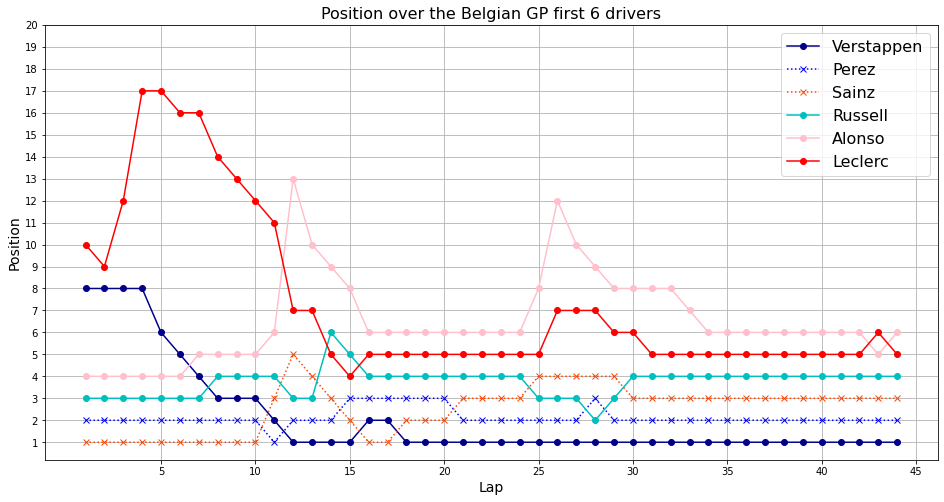

In [48]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, lap_ver['Pos'], color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x, lap_per['Pos'], 'bx:', label='Perez')
ax.plot(x, lap_sai['Pos'], color='orangered', linestyle='dotted', marker='x', label='Sainz')
ax.plot(x, lap_rus['Pos'], 'co-', label='Russell')
ax.plot(x, lap_alo['Pos'], color='pink', linestyle='solid', marker='o', label='Alonso')
ax.plot(x, lap_lec['Pos'], 'ro-', label='Leclerc')
ax.set_ylabel('Position', fontsize=14)
ax.set_xlabel('Lap', fontsize=14)
ax.set_title('Position over the Belgian GP first 6 drivers', fontsize=16)
ax.legend(loc='upper right', fontsize=16)
plt.yticks(list(range(1,21)))
plt.xticks(list(range(5,50,5)))
ax.grid(True)
plt.show()
fig.savefig('Position over the Belgian GP first 6 drivers.jpeg')

Just remember that Charles Leclerc get a 5 second penalty due to exceed the pit lane speed limit at the end of Lap 42